In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:\SnehaWork\AIProject\Dataset\Customer-Churn.csv')
df.columns[df.isna().any()].tolist() 

[]

In [3]:
Churned = df[df.Churn == 'Yes']
NonChurned = df[df.Churn == 'No']

number_of_Churned = len(Churned)
number_of_NonChurned = len(NonChurned)

Churned_percentage = round((number_of_Churned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
valid_percentage = round((number_of_NonChurned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
print(number_of_NonChurned,number_of_Churned)
#df.columns.tolist()

5174 1869


In [4]:
#df.dtypes
#count yes and no on base data, train and test

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
#error='coerce' ignores the errors. Conversion for all except for error values i.e. empty spaces. 
#.isnull() gives columns which have empty spaces
#shows the data which has TotalCharges as null. Good to drop these
df.columns[df.isnull().any()].tolist() 
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [7]:
#Drop rows with TotalCharges as null

df1 = df[df.TotalCharges!=' ']

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [10]:
#replace Yes/No to 1/0 since ML doesn't understand text

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [12]:
#One hot encoding for multiclass i.e. InternetService, Contract, PaymentMethod

multiclass_col=['InternetService', 'Contract', 'PaymentMethod']
df1 = pd.get_dummies(data=df1,columns=multiclass_col)

In [13]:
#scaling the values between 1 and 0 for below
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

#MinMaxScaler scales the data between 0 and 1
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [14]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_values(df1)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [16]:
from imblearn import over_sampling

Using TensorFlow backend.


In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train,y_train = ros.fit_resample(X_train_tbc,y_train_tbc)
#print(sorted(Counter(y_train).item()),y_train.shape)

In [25]:
y_train.shape


(8260,)

In [17]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [18]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [16]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

X_train_tbc, X_test, y_train_tbc, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15)
#X_val.shape

In [28]:
# Number of classes in training Data
y_val.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [29]:
num_of_cols = len(X.columns)
num_of_cols

26

In [31]:
X_train=X_train.reshape(X_train.shape[0],num_of_cols, 1).astype('float32') 
X_test=X_test.values.reshape(X_test.shape[0],num_of_cols, 1).astype('float32')
X_val=X_val.reshape(X_val.shape[0],num_of_cols, 1).astype('float32')

#sometimes works as X_val.values.reshape(X_val.shape[0],26, 1).astype('float32')

In [32]:
X_test.shape


(1407, 26, 1)

In [70]:
cnn = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(26,1)),  
    layers.MaxPooling1D(pool_size=3),
    
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.SpatialDropout1D(0.5),
    layers.MaxPooling1D(pool_size=3),
    layers.Dropout(0.6),
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn.summary()
#tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0)

cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#cnn.fit(X_train, y_train, epochs=200,validation_split=0.2, batch_size=375,callbacks=[tb_callback]) --80

history = cnn.fit(X_train, y_train,epochs=100,validation_data=(X_val,y_val), batch_size=375)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 24, 128)           512       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 8, 128)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 6, 128)            0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 128)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)              

6608/6608 [==============================] - 1s 194us/sample - loss: 0.4884 - accuracy: 0.7719 - val_loss: 0.4636 - val_accuracy: 0.7845
Epoch 46/100
6608/6608 [==============================] - 1s 176us/sample - loss: 0.4853 - accuracy: 0.7665 - val_loss: 0.4658 - val_accuracy: 0.7869
Epoch 47/100
6608/6608 [==============================] - 1s 177us/sample - loss: 0.4912 - accuracy: 0.7650 - val_loss: 0.4611 - val_accuracy: 0.7869
Epoch 48/100
6608/6608 [==============================] - 1s 179us/sample - loss: 0.4912 - accuracy: 0.7704 - val_loss: 0.4625 - val_accuracy: 0.7906
Epoch 49/100
6608/6608 [==============================] - 1s 180us/sample - loss: 0.4884 - accuracy: 0.7692 - val_loss: 0.4623 - val_accuracy: 0.7912
Epoch 50/100
6608/6608 [==============================] - 1s 186us/sample - loss: 0.4840 - accuracy: 0.7709 - val_loss: 0.4621 - val_accuracy: 0.7869
Epoch 51/100
6608/6608 [==============================] - 1s 210us/sample - loss: 0.4935 - accuracy: 0.7689 - val

6608/6608 [==============================] - 1s 174us/sample - loss: 0.4708 - accuracy: 0.7765 - val_loss: 0.4517 - val_accuracy: 0.7912
Epoch 100/100
6608/6608 [==============================] - 1s 180us/sample - loss: 0.4734 - accuracy: 0.7738 - val_loss: 0.4526 - val_accuracy: 0.7966


In [71]:
cnn.evaluate(X_test,y_test,batch_size=375)

1407/1407 [==============================] - 0s 53us/sample - loss: 0.4673 - accuracy: 0.7676


[0.4673085959354189, 0.76759064]

In [62]:
yp_pred= cnn.predict(X_test)
#X_test.isnull()

In [63]:
yp_pred = np.round(yp_pred)

In [72]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, yp_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.71      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[802, 231],
       [100, 274]])>

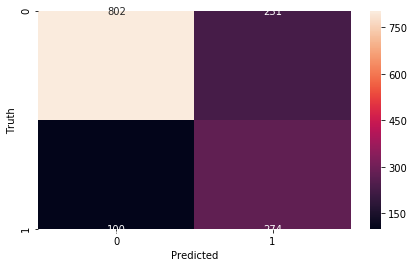

In [44]:
tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
tf.math.confusion_matrix(labels=y_test,predictions=yp_pred)

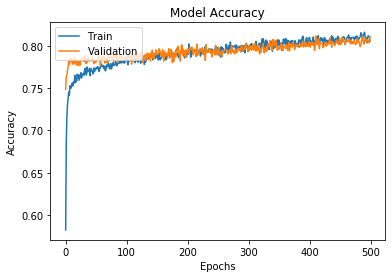

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

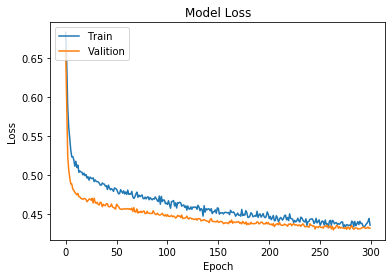

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valition'], loc='upper left')
plt.show()